<a href="https://colab.research.google.com/github/ethlynsaltzman/project-3/blob/main/project3u.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df3 = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date_.csv')

In this project I compared drug related crimes (possession and sale) between th police precinct I live in and the rest of NYC.

In [6]:
df3.shape

(170095, 24)

In [7]:
df3.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                         int64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
Community Districts         float64
Borough Boundaries          float64
City Council Districts      float64
Police Precincts            float64
Zip Codes                   float64
dtype: object

In [9]:
df3.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,Community Districts,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,...,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426),16.0,2.0,49.0,49.0,17618.0
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,...,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923),55.0,2.0,25.0,46.0,17614.0
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,...,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468),1.0,2.0,44.0,37.0,17616.0
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,...,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797),18.0,4.0,36.0,20.0,12427.0
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,...,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175),16.0,2.0,48.0,49.0,17615.0
5,262030390,01/17/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,...,1040264,190275,40.688762,-73.798020,POINT (-73.79802 40.688762),41.0,3.0,46.0,71.0,24670.0
6,262362214,01/23/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,...,999439,236537,40.815904,-73.945123,POINT (-73.945123 40.815904),18.0,4.0,36.0,20.0,12427.0
7,264579718,03/04/2023,153,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,...,997843,175671,40.648851,-73.951017,POINT (-73.951016510623 40.6488507469884),61.0,2.0,11.0,40.0,13510.0
8,262500981,01/25/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,M,14,...,987078,215157,40.757232,-73.989792,POINT (-73.98979219 40.75723226),12.0,4.0,10.0,8.0,13094.0
9,265281035,03/17/2023,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,24,...,992960,230413,40.799102,-73.968541,POINT (-73.96854103 40.79910212),20.0,4.0,23.0,15.0,12422.0


In [10]:
#Filtered dowen column to thos of interest
dft = df3[[	'ARREST_KEY','AGE_GROUP','ARREST_PRECINCT','PD_DESC','PERP_RACE','ARREST_BORO']]
dft.head()

,ARREST_KEY,AGE_GROUP,ARREST_PRECINCT,PD_DESC,PERP_RACE,ARREST_BORO
0,261209118,45-64,77,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
1,262984267,25-44,73,"CONTROLLED SUBSTANCE,SALE 3",BLACK,K
2,263664549,25-44,62,STRANGULATION 1ST,WHITE,K
3,261345231,25-44,32,STRANGULATION 1ST,BLACK,M
4,263536618,25-44,71,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K


In [11]:
# cleaning
dft['PD_DESC'].unique()

array(['ASSAULT 2,1,UNCLASSIFIED', 'CONTROLLED SUBSTANCE,SALE 3',
       'STRANGULATION 1ST', 'RAPE 3', 'FORGERY,ETC.,UNCLASSIFIED-FELO',
       'BURGLARY,UNCLASSIFIED,UNKNOWN', 'ARSON 2,3,4', 'ASSAULT 3',
       'ROBBERY,OPEN AREA UNCLASSIFIED', 'LARCENY,PETIT FROM OPEN AREAS,',
       'RAPE 1', 'WEAPONS POSSESSION 3', 'CONSPIRACY 2, 1',
       'HARASSMENT,SUBD 1,CIVILIAN', 'RAPE 2', 'LEWDNESS,PUBLIC',
       'JOSTLING', 'SEXUAL ABUSE', '(null)',
       'IMPERSONATION 2, PUBLIC SERVAN', 'ESCAPE 3', 'ARSON 1',
       'BURGLARY,RESIDENCE,NIGHT', 'BURGLARS TOOLS,UNCLASSIFIED',
       'MENACING,UNCLASSIFIED', 'TRAFFIC,UNCLASSIFIED MISDEMEAN',
       'LEAVING SCENE-ACCIDENT-PERSONA', 'RECKLESS ENDANGERMENT 2',
       'CONTROLLED SUBSTANCE, POSSESSI', 'SEXUAL ABUSE 3,2',
       'FORGERY,ETC.-MISD.', 'INTOXICATED DRIVING,ALCOHOL',
       'FUGITIVE/OTHER STATES', 'THEFT OF SERVICES, UNCLASSIFIE',
       'FORGERY-ILLEGAL POSSESSION,VEH', 'STOLEN PROPERTY 3,POSSESSION',
       'AGGRAVATED HARAS

In [12]:
dft.head(10)

,ARREST_KEY,AGE_GROUP,ARREST_PRECINCT,PD_DESC,PERP_RACE,ARREST_BORO
0,261209118,45-64,77,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
1,262984267,25-44,73,"CONTROLLED SUBSTANCE,SALE 3",BLACK,K
2,263664549,25-44,62,STRANGULATION 1ST,WHITE,K
3,261345231,25-44,32,STRANGULATION 1ST,BLACK,M
4,263536618,25-44,71,"ASSAULT 2,1,UNCLASSIFIED",BLACK,K
5,262030390,45-64,113,STRANGULATION 1ST,BLACK,Q
6,262362214,25-44,32,STRANGULATION 1ST,BLACK,M
7,264579718,<18,67,RAPE 3,BLACK,K
8,262500981,45-64,14,"FORGERY,ETC.,UNCLASSIFIED-FELO",BLACK,M
9,265281035,45-64,24,"BURGLARY,UNCLASSIFIED,UNKNOWN",BLACK,M


In [13]:
dft['PD_DESC']= dft['PD_DESC'].apply(str)
dft['ARREST_PRECINCT']= dft['ARREST_PRECINCT'].apply(str)


<ipython-input-13-1e884d45d9b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['PD_DESC']= dft['PD_DESC'].apply(str)
<ipython-input-13-1e884d45d9b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['ARREST_PRECINCT']= dft['ARREST_PRECINCT'].apply(str)


In [14]:
#decided to look specifically at cerimes related to controlled substances
dft = (dft[dft['PD_DESC'].str.contains('CONTROLLED SUBSTANCE')])

In [15]:
dft.head(10)

,ARREST_KEY,AGE_GROUP,ARREST_PRECINCT,PD_DESC,PERP_RACE,ARREST_BORO
1,262984267,25-44,73,"CONTROLLED SUBSTANCE,SALE 3",BLACK,K
143,263173253,25-44,25,"CONTROLLED SUBSTANCE, POSSESSI",WHITE HISPANIC,M
147,264350032,45-64,75,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,K
156,264177492,25-44,90,"CONTROLLED SUBSTANCE, POSSESSI",BLACK HISPANIC,K
158,264965240,45-64,76,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,K
165,266702719,25-44,106,"CONTROLLED SUBSTANCE,INTENT TO",BLACK,Q
188,266019757,45-64,28,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,M
247,262567032,25-44,83,"CONTROLLED SUBSTANCE,INTENT TO",BLACK,K
281,264717985,25-44,40,"CONTROLLED SUBSTANCE,INTENT TO",BLACK HISPANIC,B
290,264993780,25-44,40,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,B


In [16]:
#created column to seprate my police precinct from tghe rest of the city
import numpy as np
dft['Precinct'] = np.where(dft['ARREST_PRECINCT'] == "50", 'My Precinct', 'Rest_of_NYC')
dfg = dft.groupby(['Precinct']).count()
print(dfg)


             ARREST_KEY  AGE_GROUP  ARREST_PRECINCT  PD_DESC  PERP_RACE  \
Precinct                                                                  
My Precinct          26         26               26       26         26   
Rest_of_NYC       11179      11179            11179    11179      11179   

             ARREST_BORO  
Precinct                  
My Precinct           26  
Rest_of_NYC        11179  


In [17]:
# wante to collapse intotwo categories possesion only, and intent to sell or sale
dft['PD_DESC'].unique()

array(['CONTROLLED SUBSTANCE,SALE 3', 'CONTROLLED SUBSTANCE, POSSESSI',
       'CONTROLLED SUBSTANCE,INTENT TO', 'CONTROLLED SUBSTANCE, INTENT T',
       'CONTROLLED SUBSTANCE,SALE 2', 'CONTROLLED SUBSTANCE,POSSESS.',
       'CONTROLLED SUBSTANCE, SALE 5', 'CONTROLLED SUBSTANCE,SALE 1',
       'CONTROLLED SUBSTANCE, SALE 4'], dtype=object)

In [18]:
dft.shape

(11205, 7)

In [19]:
dft['SALE']= dft['PD_DESC'].str.contains('INTENT|SALE')



In [20]:
dft.tail(10)

,ARREST_KEY,AGE_GROUP,ARREST_PRECINCT,PD_DESC,PERP_RACE,ARREST_BORO,Precinct,SALE
169921,273423890,25-44,106,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,Q,Rest_of_NYC,False
169943,274696709,45-64,121,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,S,Rest_of_NYC,False
169953,274191981,45-64,25,"CONTROLLED SUBSTANCE, POSSESSI",WHITE HISPANIC,M,Rest_of_NYC,False
169970,269110743,25-44,79,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,K,Rest_of_NYC,False
169990,274366071,45-64,79,"CONTROLLED SUBSTANCE,SALE 3",BLACK HISPANIC,K,Rest_of_NYC,True
170012,268945614,45-64,83,"CONTROLLED SUBSTANCE, POSSESSI",BLACK HISPANIC,K,Rest_of_NYC,False
170020,273833360,25-44,33,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,M,Rest_of_NYC,False
170027,269489196,45-64,60,"CONTROLLED SUBSTANCE, POSSESSI",WHITE,K,Rest_of_NYC,False
170059,272990065,45-64,103,"CONTROLLED SUBSTANCE,INTENT TO",BLACK,Q,Rest_of_NYC,True
170074,274572309,45-64,25,"CONTROLLED SUBSTANCE, POSSESSI",BLACK,M,Rest_of_NYC,False


In [21]:
#wanted to compare possesion/sale in my police precinct with the mean for other NYC precincts
dfl= dft.groupby(['Precinct','ARREST_PRECINCT','SALE'], as_index= False)['ARREST_KEY'].count()
dfg = dfl.groupby(['Precinct','SALE'], as_index = False).agg ({'ARREST_KEY': 'mean'})
print(dfg)

      Precinct   SALE  ARREST_KEY
0  My Precinct  False   21.000000
1  My Precinct   True    5.000000
2  Rest_of_NYC  False   86.680000
3  Rest_of_NYC   True   62.373333


[Text(0, 0.5, '# of arrests')]

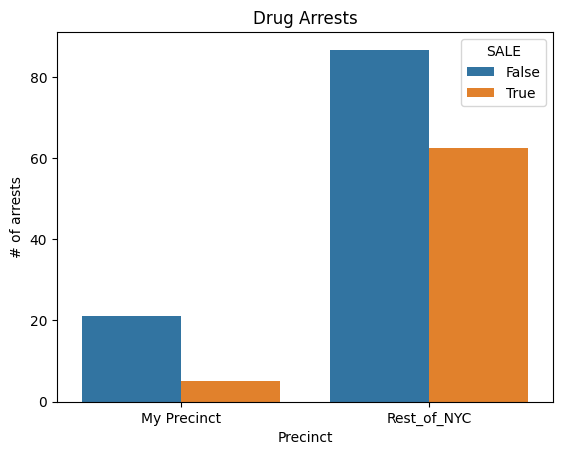

In [22]:
#visulaiztion comparing drug arrests in 50th precinct and throughout the city
import seaborn as sns
ax = sns.barplot(x = 'Precinct', y = 'ARREST_KEY',data = dfl,hue="SALE", errorbar=None)
ax.set(title='Drug Arrests')
ax.set(ylabel='# of arrests')


In [23]:
#breakdiown by borough
dft['ARREST_BORO']= dft['ARREST_BORO'].apply(str)
dfn= dft.groupby(['ARREST_BORO','SALE'], as_index= False)['ARREST_KEY'].count()
print(dfn)

  ARREST_BORO   SALE  ARREST_KEY
0           B  False        1244
1           B   True         880
2           K  False        1558
3           K   True        1363
4           M  False        2231
5           M   True        1364
6           Q  False        1216
7           Q   True         778
8           S  False         273
9           S   True         298


In [480]:
dft.shape

(11091, 8)

[Text(0, 0.5, '# of arrests')]

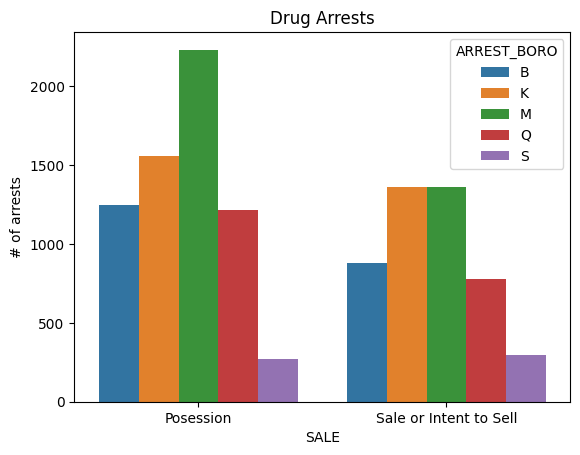

In [25]:
#visualization showing break down by borough of the two categories of drug arrests

ax = sns.barplot(x = 'SALE',y='ARREST_KEY', data= dfn, hue="ARREST_BORO")
ax.set(title='Drug Arrests')
ax.set_xticklabels(['Posession', 'Sale or Intent to Sell'])
ax.set(ylabel='# of arrests')


In [28]:
#Visuyalization showing all precincts in NYC distribution in each boorough
dfm= dft.groupby(['Precinct','ARREST_BORO','ARREST_PRECINCT'], as_index= False)['ARREST_KEY'].count()

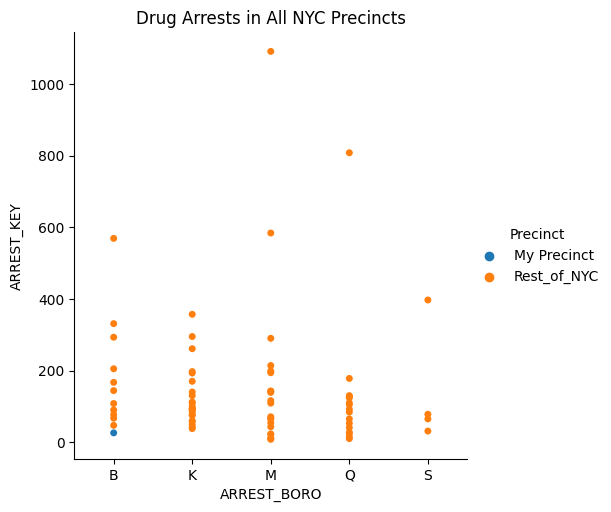

In [29]:
Pre = sns.catplot(data=dfm, x="ARREST_BORO",y='ARREST_KEY', jitter=False,hue='Precinct')
Pre.set(title='Drug Arrests in All NYC Precincts')

Conclusion:  My police district in the Bronx has much lower  # of drug arrests than the city average, the Bronx as a whole is third in the number of arrests for sales and in the number of arrests for posession.  Overall arrests for possesion are  higher than arrests for sale except in Staten Island where they are ver simalar.